In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = breast_cancer_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()

data_1 = data_processor.impute_missing_values(raw_data)

data_2 = data_1.drop(columns=['Sample code number'])

data_3 = data_processor.encode_nominal_features(data_2)

data_4 = data_processor.encode_ordinal_features(data_3)

data_5 = data_processor.standardize_data(data_4,data_4,features=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [3]:
data_train, data_val = cross_validator.random_partition(data_5, random_state=42)

In [4]:
data_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class_2,Class_4
82,0.206788,-0.371782,-0.742767,-0.632794,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
51,0.206788,-0.044070,-0.069800,0.417854,-0.549168,0.126419,-0.179534,0.371049,-0.343666,0,1
220,-1.213798,-0.699494,-0.742767,-0.282578,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
559,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
544,-0.858651,-0.699494,-0.069800,-0.282578,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.561934,2.249915,-0.406284,1.818719,3.063712,-0.428851,1.460910,1.680964,4.903909,0,1
106,1.982519,2.249915,2.285586,1.818719,-0.549168,1.792229,0.230577,-0.611387,-0.343666,0,1
270,1.272227,0.283642,1.276135,-0.632794,-0.097558,1.792229,-0.179534,2.008442,0.239398,0,1
435,1.982519,1.594490,2.285586,-0.632794,-0.097558,1.792229,0.640688,-0.611387,-0.343666,0,1


In [5]:
data = data_train.to_numpy()
X = data[:,:-2]
y = data[:,-2:]

In [6]:
y.shape

(559, 2)

In [7]:
from models.neural_networks import LinearNetwork

linearnetwork = LinearNetwork(config)

losses = linearnetwork.logistic_regression(X,y,epochs=500,lr=0.01)

0.6988439265225128
0.40334374046077415
0.3835650821843446
0.3639816496708008
0.3445951333434199
0.3254163845207723
0.3064759247562096
0.28784087500269573
0.2696362829998986
0.2520582218477121
0.23534989599158626
0.219721606879459
0.205269928972573
0.1919968650789698
0.1798991819176544
0.16899824243146133
0.15928844948998644
0.1506960110057163
0.1431059921471423
0.13641157451676014
0.1305313548119743
0.1253945776265839
0.12092210931086622
0.11702439433044813
0.11361256681488592
0.11060783888330149
0.10794404310393863
0.10556667858235742
0.10343158835341845
0.10150385425756321
0.09975649442824881
0.0981688260318587
0.09672476108363984
0.09541135236550592
0.0942177297504769
0.09313440063914571
0.09215281950092899
0.0912651334448248
0.09046403630035121
0.08974268740750944
0.08909466720867641
0.08851395165795758
0.08799489413064591
0.08753220846108338
0.08712095045857107
0.08675649779835777
0.08643452957970515
0.08615100724337965
0.0859021582341945
0.08568446311700477
0.08549464610729536
0.

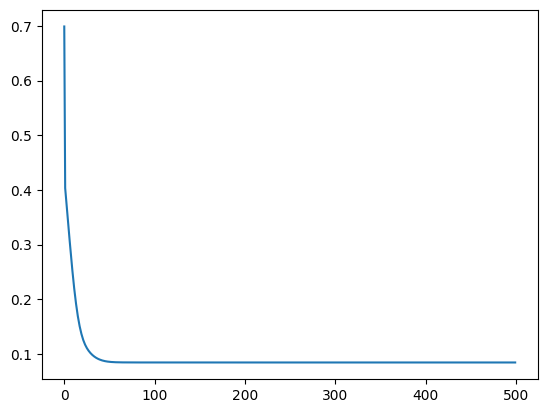

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [9]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-2]
y_test = data_test[:,-2:]

In [10]:
y_true = np.argmax(y_test,axis=1)
y_true

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
pred = linearnetwork.predict(X_test)

In [12]:
accuracy = np.mean(y_true==pred)

In [13]:
accuracy

0.9571428571428572